In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
data.rename(columns={'SepalLengthCm':'SL','SepalWidthCm':'SW','PetalLengthCm':'PL','PetalWidthCm':'PW'},inplace=True)

In [25]:
iris_setosa=data[data['Species']=='Iris-setosa']
iris_versicolor=data[data['Species']=='Iris-versicolor']
iris_virginica=data[data['Species']=='Iris-virginica']

# Measures of Spread

<p>Measures of spread gives us an idea of how much the data is spread or varying. Some important measures of spread are :</p>

<ol>
    <li>Range</li>
    <li>Interquartile Range (IQR)</li>
    <li>Variance</li>
    <li>Standard Deviation</li>
</ol>


## 1. Range
<p>The range describes the difference between the largest and the smallest points in your data.</p>

In [26]:
r=np.max(iris_setosa['PL']) - np.min(iris_setosa['PL'])
print("The range is",r)

The range is 0.8999999999999999


## 2. Percentiles

A percentile is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations falls. For example, the 20th percentile is the value below which 20% of the observations may be found.

In [30]:
mylist=[1,2,3,4,5,6,7,8,9]

print(np.percentile(mylist,25))
print(np.percentile(mylist,90))

3.0
8.2


In [31]:
np.percentile(iris_setosa['PL'],95)

1.7

## 3. Quartiles

Quartiles are the values that divide a list of numbers into quarters:

Put the list of numbers in order<br>
Then cut the list into four equal parts<br>
The Quartiles are at the "cuts"<br><br>

<img src="https://www.mathsisfun.com/data/images/quartiles-a.svg"/>


In [32]:
print(np.percentile(iris_setosa['PL'],25))
print(np.percentile(iris_setosa['PL'],50))
print(np.percentile(iris_setosa['PL'],75))
print(np.percentile(iris_setosa['PL'],100))

1.4
1.5
1.5750000000000002
1.9


## 4. Interquartile Range
<p>The interquartile range (IQR) is a measure of statistical dispersion between upper (75th) and lower (25th) quartiles.</p>

<img src="https://miro.medium.com/max/700/0*ezK4-_vXH7onURQN.png">

In [33]:
iqr=np.percentile(iris_setosa['PL'],75)-np.percentile(iris_setosa['PL'],25)
print("The Inter Quartile Range is",iqr)

The Inter Quartile Range is 0.17500000000000027


## 5. Mean Absoulute Deviation

The Absolute Deviation from Mean, also called Mean Absolute Deviation (MAD), describe the variation in the data set, in sense that it tells the average absolute distance of each data point in the set. It is calculated as

<img src="https://miro.medium.com/max/414/1*LAgwgmHiJaWbuwf2CIpxNQ.png"/>

<b>Example</b>

2,5,1,6,7,3,11

The mean is 5

(|2-5| + |5-5| + |1-5| + |6-5| + |7-5| + |3-5| + |11-5|)/7

3+0+4+1+2+2+6=18/7=2.5

## 6. Variance

<p>Variance measures how far are data points spread out from the mean.</p>

<p>The variance is computed by finding the difference between every data point and the mean, squaring them, summing them up and then taking the average of those numbers.</p>

<img src="https://miro.medium.com/max/411/1*0soMAm7jXAxGDLdIa-Hdog.png"/>

The squares are used during the calculation because they weight outliers more heavily than points that are near to the mean. This prevents that differences above the mean neutralize those below the mean.

<b>Example</b>

2,5,1,6,7,3,11

The mean is 5

((2-5)^2 + (5-5)^2 + (1-5)^2 + (6-5)^2 + (7-5)^2 + (3-5)^2 + (11-5)^2)/7

9+0+16+1+4+4+36=70/7=10

In [34]:
np.var(iris_setosa['PL'])

0.02950400000000001

### The problem with Variance

The problem with Variance is that because of the squaring, it is not in the same unit of measurement as the original data.


Let’s say you are dealing with a dataset that contains centimeter values. Your variance would be in squared centimeters and therefore not the best measurement. 

## 7. Variance Vs Median Absolute Deviation

Variance is easy to work with in comparision to MAD as it works on squaring(a smooth function) the deviation  in comparison to MAD where we use modulus( a non smooth function).

Mathematically speaking smooth functions are easier to work with in comparison to non smooth functions

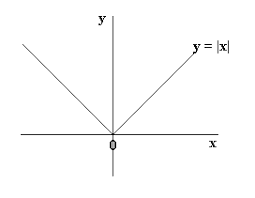

## 8. Standard Deviation

The square root of Variance is called the Standard Deviation. It is calculated as:

<img src="https://miro.medium.com/max/412/1*R2mkgsBZ13CbN-1OMC0vMw.png">

<b>Example</b>

2,5,1,6,7,3,11

The mean is 5

((2-5)^2 + (5-5)^2 + (1-5)^2 + (6-5)^2 + (7-5)^2 + (3-5)^2 + (11-5)^2)/7

9+0+16+1+4+4+36=70/7=10

SD=sqrt(10)=3.16

In [35]:
np.std(iris_setosa['PL'])

0.17176728442867115

## 9. Median Absolute Deviation

MAD is the median of all the number obtained from subtracting and calculating the absolute value of every observation with the median.

<b>Example:</b>

1,3,5,6,7,8,9

Median is 6

|1-6|,|3-6|,|5-6|,|6-6|,|7-6|,|8-6|,|9-6|

5,3,1,0,1,2,3

0,1,1,2,3,3,5

Median Absolute Deviation is 2

In [36]:
from statsmodels import robust
robust.mad(np.array([1,3,5,6,7,8,9]))

2.965204437011204

## 10. Standard Deviation Vs Median Absolute Deviation

Just like mean vs median, Median Absolute Deviation is free from the effects of outliers from which Standard Deviation can suffer

## 11. Box Plots

<img src="https://miro.medium.com/max/700/1*2c21SkzJMf3frPXPAR_gZA.png"/>

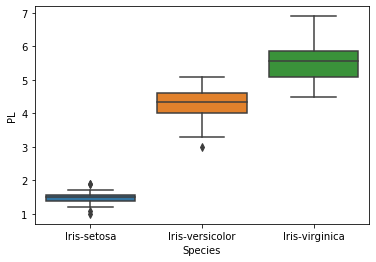

In [38]:
sns.boxplot(x='Species',y='PL',data=data)